In [18]:
import pandas as pd
import numpy as np
from sklearn.linear_model import lasso_path, LassoCV, RidgeCV, Ridge
from itertools import cycle
import matplotlib.pyplot as plt
from cycler import cycler

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv("Hitters.csv")

In [4]:
df

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,-Willie McGee,497,127,7,65,48,37,5,2703,806,...,379,311,138,N,E,325,9,3,700.0,N
318,-Willie Randolph,492,136,5,76,50,94,12,5511,1511,...,897,451,875,A,E,313,381,20,875.0,A
319,-Wayne Tolleson,475,126,3,61,43,52,6,1700,433,...,217,93,146,A,W,37,113,7,385.0,A
320,-Willie Upshaw,573,144,9,85,60,78,8,3198,857,...,470,420,332,A,E,1314,131,12,960.0,A


In [5]:
df.columns

Index(['Unnamed: 0', 'AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years',
       'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League',
       'Division', 'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

In [6]:
df_num = df.select_dtypes(np.number)
df_num = df_num.dropna()

In [7]:
df_num

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3,700.0
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20,875.0
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7,385.0
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12,960.0


In [8]:
X = df_num.drop(columns="Salary")
y = df_num['Salary']

In [9]:
alphas, coefs, _ = lasso_path(X.values, y.values)

In [10]:
coefs.shape

(16, 100)

(3.1433409242108894,
 6.443340924210889,
 -0.23312546667795137,
 0.6137054319885301)

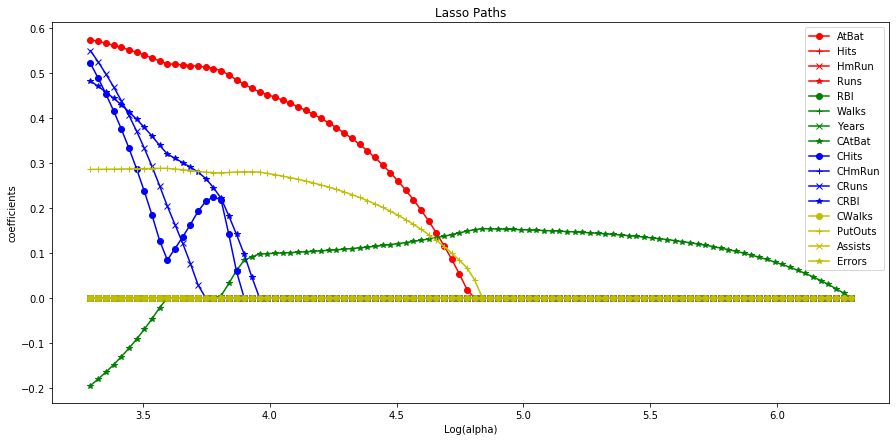

In [24]:
NUM_COLORS = 16

cyc1 = cycler(color=['r', 'g', 'b', 'y','k'])
cyc2 = cycler(marker=['o', '+', 'x', '*'])

fig = plt.figure(1, figsize=(15, 7))

ax = fig.add_subplot(111)
ax.set_prop_cycle(cyc1*cyc2)

log_alphas_lasso = np.log10(alphas)
names = df_num.columns.values

for coef, name in zip(coefs, names):
    ax.plot(log_alphas_lasso, coef, label=name)
    
plt.xlabel('Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso Paths')
plt.legend(loc=0)
plt.axis('tight')

The final 3 predictors that remain in the model is 'AtBat', 'Assists', 'CAtBat'.

In [25]:
las_model = LassoCV(cv=4, random_state=0)
las_model.fit(X,y)

/Users/zhangziyang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10228.799361880869, tolerance: 5331.911278864535
  positive)


LassoCV(alphas=None, copy_X=True, cv=4, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=0, selection='cyclic',
        tol=0.0001, verbose=False)

In [26]:
las_model.alpha_

540.6556677332911

In [28]:
np.log10(las_model.alpha_)

2.7329207600913685

In [33]:
print("Predictors left:", X.columns[np.where(las_model.coef_ != 0)].values)
print("Number of predictors left:", X.columns[np.where(las_model.coef_ != 0)].values.shape[0])

Predictors left: ['Hits' 'Walks' 'CAtBat' 'CHits' 'CRuns' 'CRBI' 'CWalks' 'PutOuts'
 'Assists']
Number of predictors left: 9


9 predictors left.

(0.75, 6.25, -3.4088447265663695, 8.354579982114823)

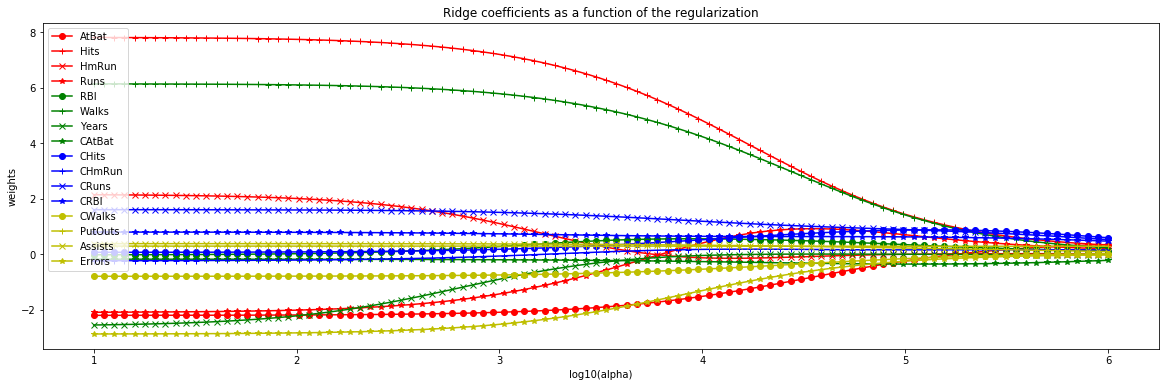

In [37]:
coefs = []
alphas = np.logspace(1, 6, 100)

clf = Ridge()

# Train the model with different regularisation strengths
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)
    
plt.figure(2, figsize=(20, 6))


ax = plt.gca()
ax.set_prop_cycle(cyc1*cyc2)
for coef, name in zip(np.array(coefs).T, names):
    ax.plot(np.log10(alphas), coef, label=name)
    
ax.legend()
plt.xlabel('log10(alpha)')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.legend(loc=0)
plt.axis('tight')

In [38]:
rig_model = RidgeCV(alphas=alphas, cv=4)
rig_model.fit(X,y)

RidgeCV(alphas=array([1.00000000e+01, 1.12332403e+01, 1.26185688e+01, 1.41747416e+01,
       1.59228279e+01, 1.78864953e+01, 2.00923300e+01, 2.25701972e+01,
       2.53536449e+01, 2.84803587e+01, 3.19926714e+01, 3.59381366e+01,
       4.03701726e+01, 4.53487851e+01, 5.09413801e+01, 5.72236766e+01,
       6.42807312e+01, 7.22080902e+01, 8.11130831e+01, 9.11162756e+01,
       1.02353102e+02, 1.14975700e+0...
       1.09749877e+05, 1.23284674e+05, 1.38488637e+05, 1.55567614e+05,
       1.74752840e+05, 1.96304065e+05, 2.20513074e+05, 2.47707636e+05,
       2.78255940e+05, 3.12571585e+05, 3.51119173e+05, 3.94420606e+05,
       4.43062146e+05, 4.97702356e+05, 5.59081018e+05, 6.28029144e+05,
       7.05480231e+05, 7.92482898e+05, 8.90215085e+05, 1.00000000e+06]),
        cv=4, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [39]:
rig_model.alpha_

15199.11082952933

Q2

Bias and variance are two sources of testing error of a machine learning model. Bias-variance tradeoff basically is that low-bias models tend to have high variance and low-variance models tend to have high bias.

What regularization does is to reduce the variance of a model to achieve and at the same time not raise its bias much. 

The model in Q1 has 16 numeric predictors. Thess predictor will probably introduce high variance because some of them may not be related to the target. Regularization just shrink the weights (maybe to 0) of those predictors and reduce the variance of the model.